In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
X, y = load_iris(return_X_y=True, as_frame=True)
class_names = ['setosa', 'versicolor', 'virginica']

In [20]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [107]:
model = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.015).fit(X, y)

In [108]:
model.tree_.max_depth, model.tree_.node_count, model.tree_.n_leaves

(3, 7, 4)

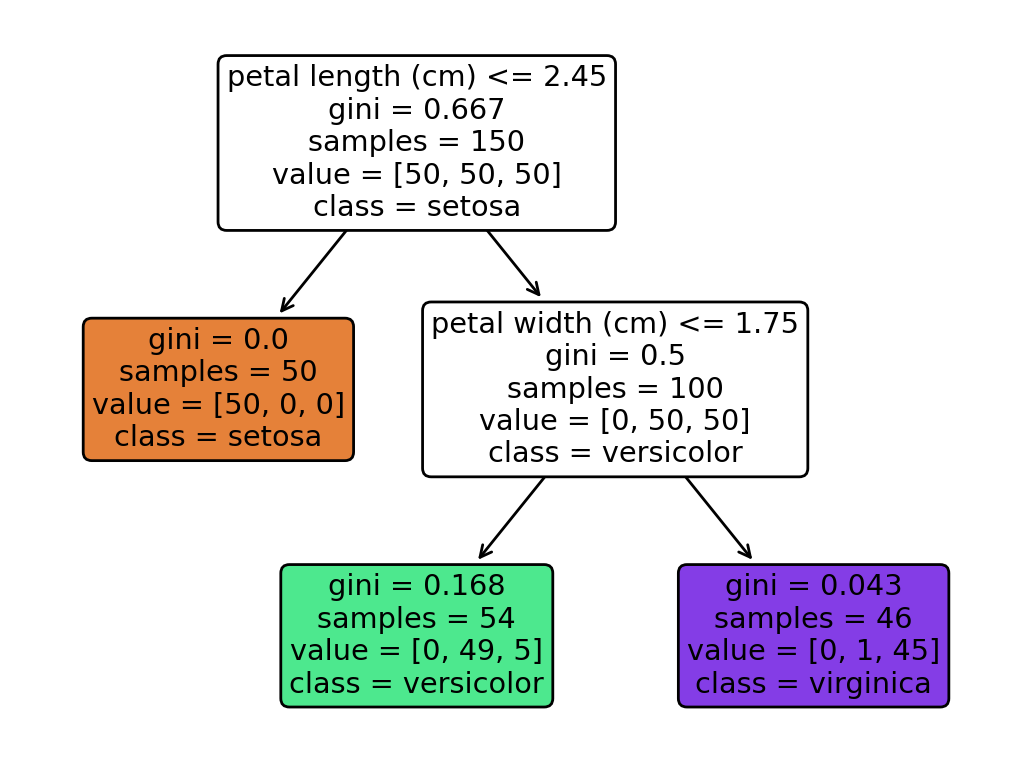

In [104]:
plt.figure(dpi=200)
plot_tree(model, feature_names=model.feature_names_in_, class_names=class_names,
          filled=True, rounded=True)
plt.show()

In [106]:
print(classification_report(y, model.predict(X), target_names=class_names, digits=4))

              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        50
  versicolor     0.9074    0.9800    0.9423        50
   virginica     0.9783    0.9000    0.9375        50

    accuracy                         0.9600       150
   macro avg     0.9619    0.9600    0.9599       150
weighted avg     0.9619    0.9600    0.9599       150



In [83]:
model.feature_importances_

array([0.       , 0.       , 0.5736694, 0.4263306])

In [84]:
for f, i in zip(model.feature_names_in_, model.feature_importances_):
  print(f"{f} impportance: {i}")

sepal length (cm) impportance: 0.0
sepal width (cm) impportance: 0.0
petal length (cm) impportance: 0.5736694008319915
petal width (cm) impportance: 0.42633059916800853


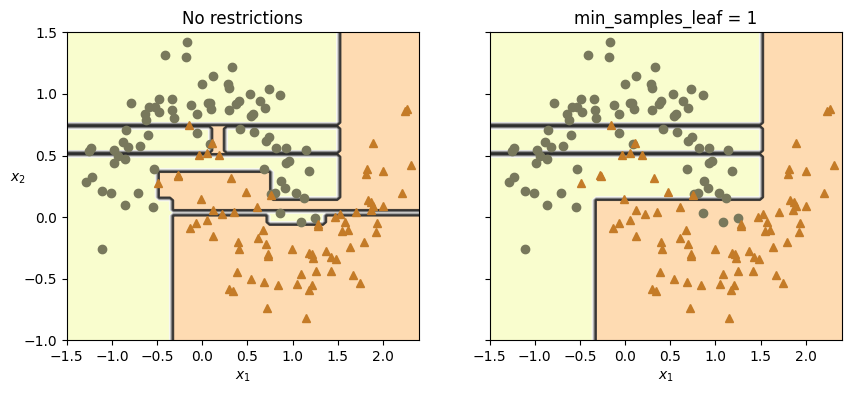

In [88]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [89]:
tree_clf1.get_depth()

8

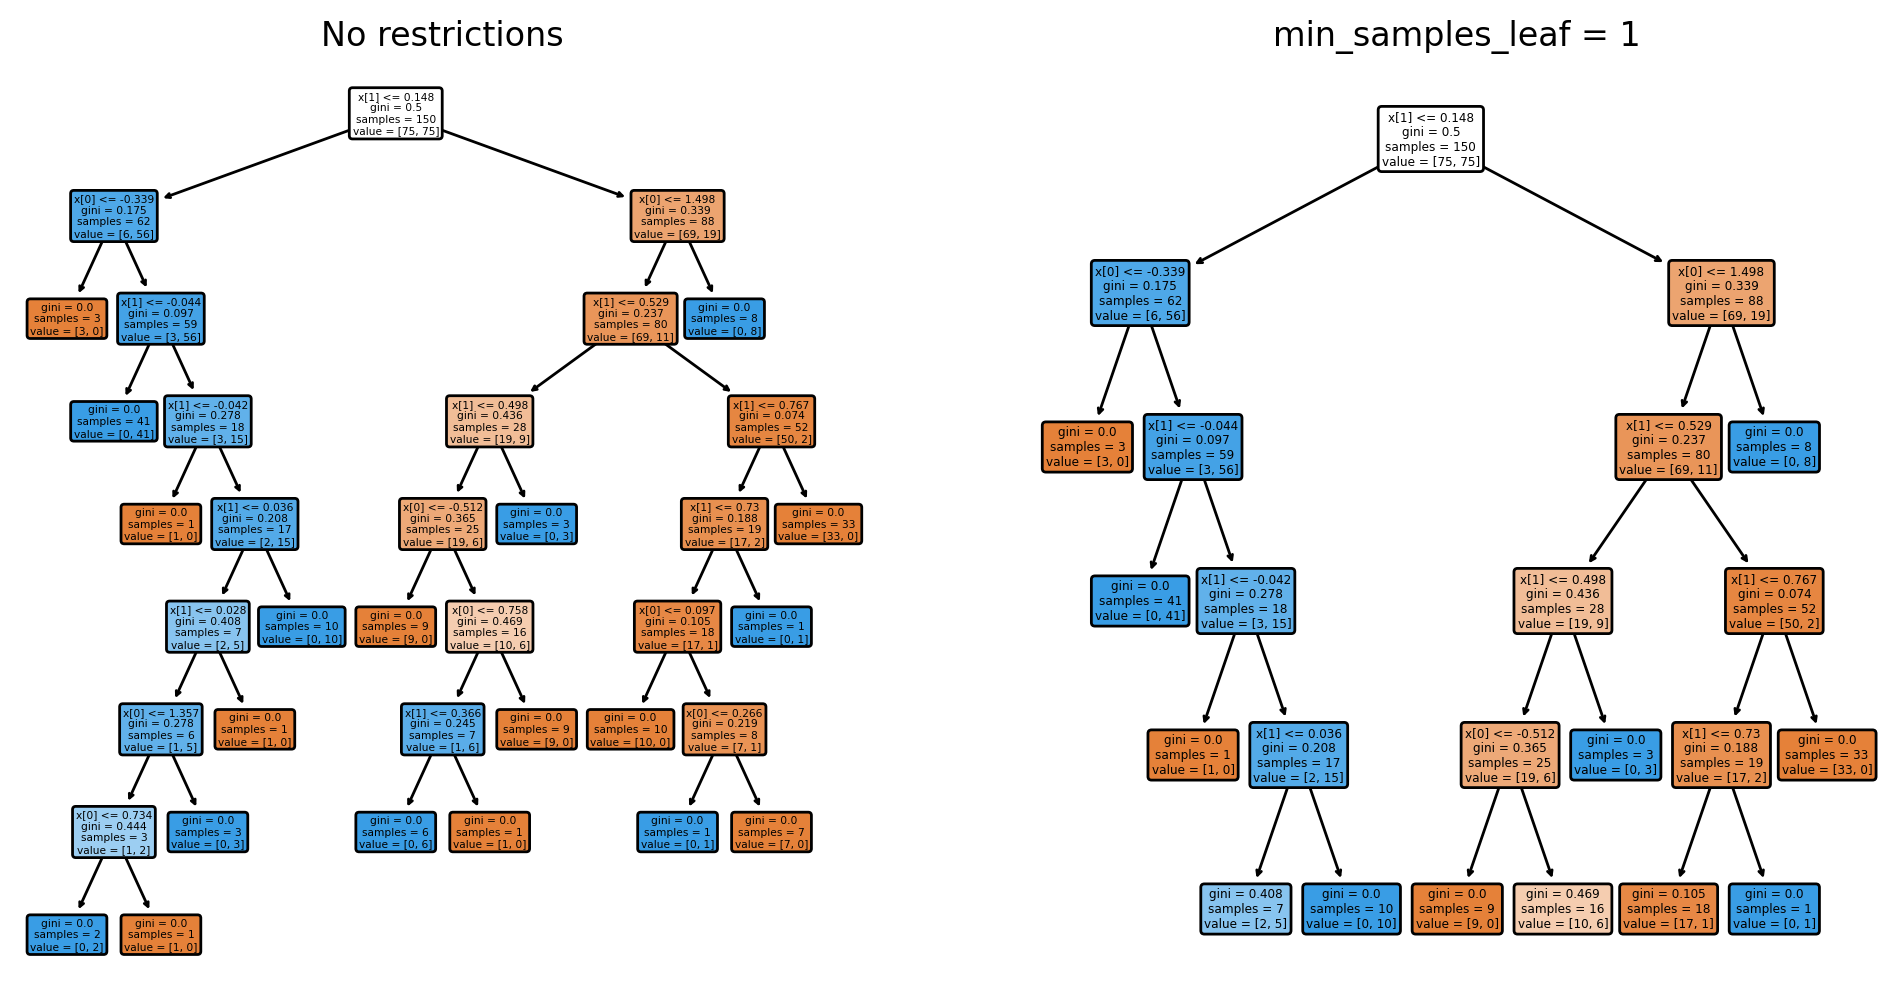

In [90]:
_, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=200)
plot_tree(tree_clf1, filled=True, rounded=True, ax=axes[0])
plot_tree(tree_clf2, filled=True, rounded=True, ax=axes[1])
axes[0].title.set_text('No restrictions')
axes[1].title.set_text(f'min_samples_leaf = {tree_clf2.min_samples_leaf}')
plt.show()